In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
housing = pd.read_csv('housing.csv')

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

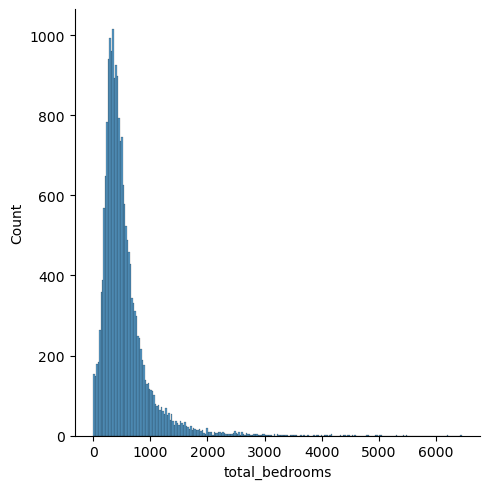

In [9]:
sns.displot(housing['total_bedrooms'])

C:\Users\umeshdutta\AppData\Local\Temp\ipykernel_9436\2034833211.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr(), annot=True)


<Axes: >

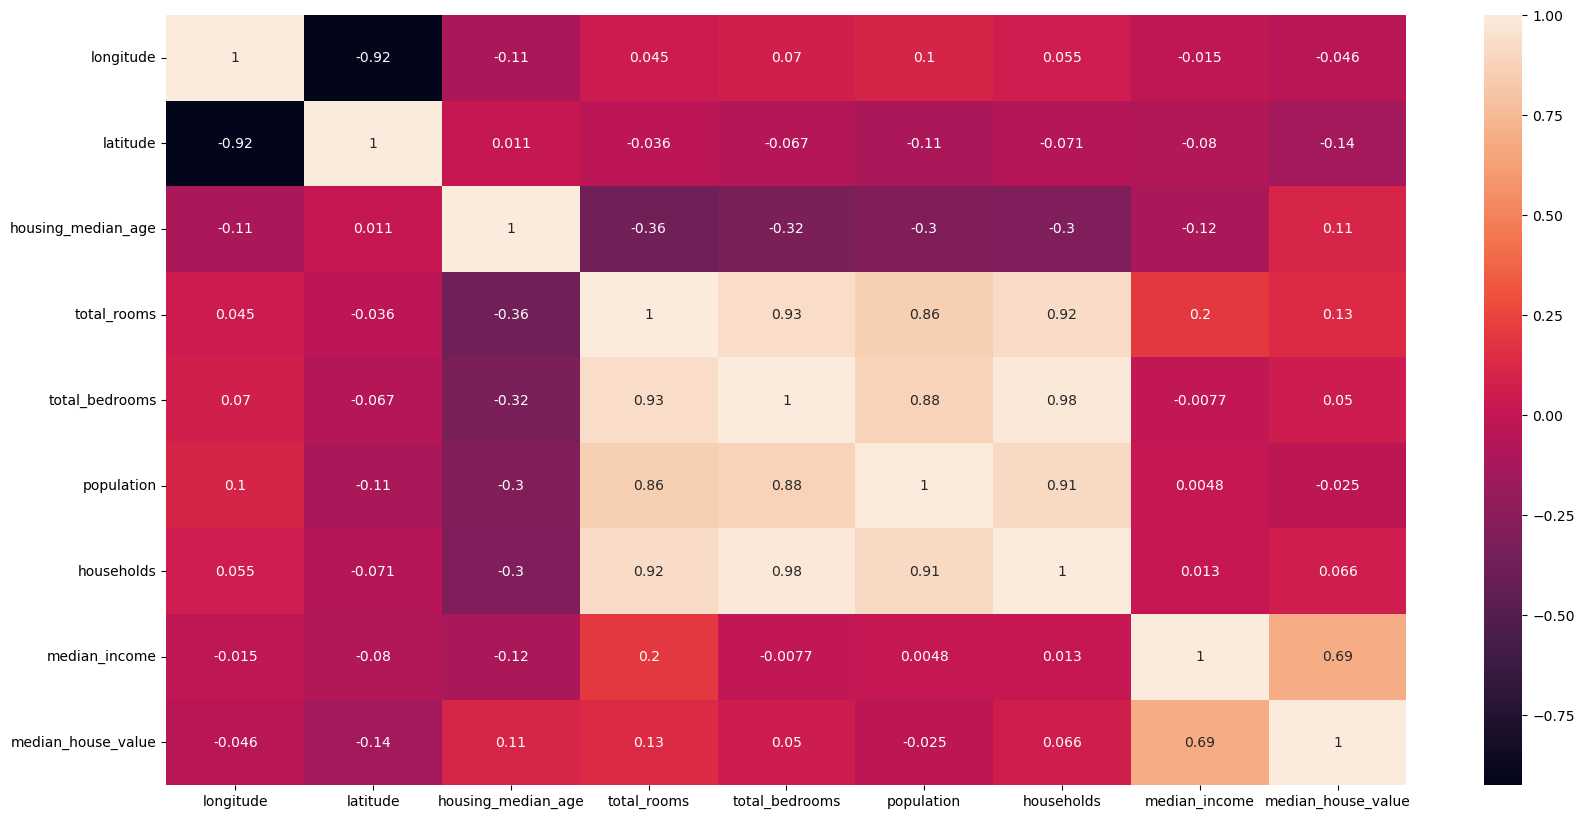

In [11]:
plt.figure(figsize=(20,10)) 
sns.heatmap(housing.corr(), annot=True)

In [20]:
def findOutliers(df,col):
    column = col 
    x = df[column].describe()
    print(x)
    y = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
    Q25 = x[y['25']]
    Q75 = x[y['75']]
    IQR = Q75-Q25
    lowerBound = Q25-1.5*IQR
    upperBound = Q75+1.5*IQR
    data = df[(df[column] < lowerBound) | (df[column] > upperBound)]
    print(f"No. of outliers: {len(data[column])}, out of {len(housing[column])}")
    #let's remove outliers from the data frame and store in z variable
    z = housing[~housing[column].isin(data[column])]
    return z

In [34]:
df_cleaned = findOutliers(housing,"total_rooms")
# update the housing data frame with the cleaned data frame
housing = df_cleaned

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64
No. of outliers: 1287, out of 20640


In [35]:
# now lets get the null values in the dataset
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        196
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [36]:
# now use imputer to fill the null values in total_bedrooms column with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy ="median")
imputer.fit(housing.iloc[:,4:5])
housing.iloc[:,4:5] = imputer.transform(housing.iloc[:,4:5])
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [39]:
# now manipulate the ocean_proximity field and change it using label encoder
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing.describe()

0    8590
1    6048
4    2530
3    2180
2       5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000,19353.000000
mean,-119.591048,35.647446,29.522193,2225.118793,463.045368,1244.520384,433.455537,3.812732,204961.348835,1.173875
std,2.000904,2.142796,12.308489,1153.906566,253.146946,711.481397,235.163940,1.883560,115283.433436,1.428681
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.810000,33.940000,19.000000,1406.000000,289.000000,766.000000,272.000000,2.527500,117600.000000,0.000000
50%,-118.500000,34.260000,30.000000,2036.000000,416.000000,1118.000000,392.000000,3.481200,177700.000000,1.000000
75%,-118.030000,37.720000,38.000000,2892.000000,592.000000,1591.000000,557.000000,4.668700,262200.000000,1.000000
max,-114.310000,41.950000,52.000000,5694.000000,2610.000000,8733.000000,2406.000000,15.000100,500001.000000,4.000000


In [41]:
# split data into train and test data set
from sklearn.model_selection import train_test_split
housing_inp = housing.drop("median_house_value",axis=1)
housing_out = housing["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(housing_inp, housing_out, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11611, 9)
(7742, 9)
(11611,)
(7742,)


In [43]:
# use scaler to make sure that no independent variable dominates the model
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

In [44]:
# use linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
# print the intercept
print(lm.intercept_)

205708.42640599413


In [46]:
predictions = lm.predict(X_test)

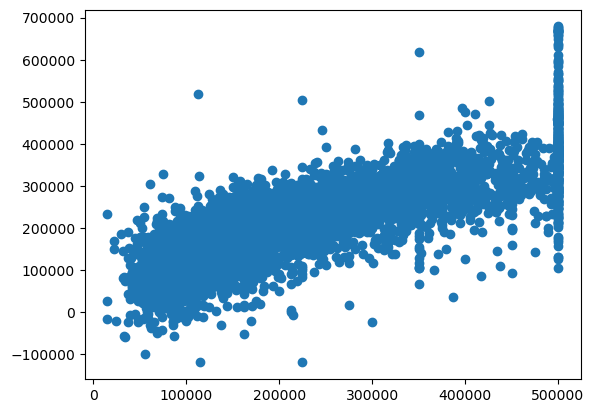

In [47]:
plt.scatter(y_test,predictions)

In [49]:
print(predictions[0:5])
print(y_test[0:5])

[197060.10206457 292415.35584355 150731.72290413 131589.27223822
 164076.2027957 ]
7135     195800.0
8958     322900.0
7229     173900.0
13064    101100.0
14899    121900.0
Name: median_house_value, dtype: float64


C:\Users\umeshdutta\AppData\Local\Temp\ipykernel_9436\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


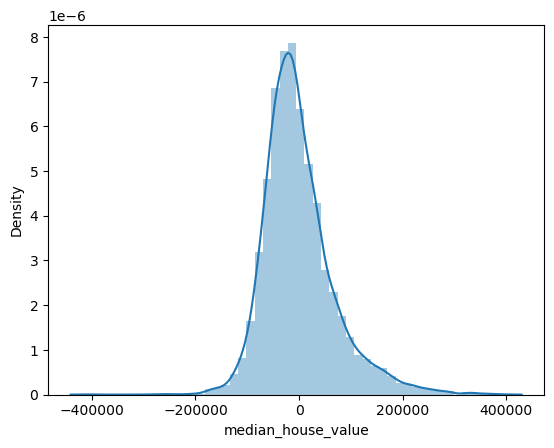

In [50]:
sns.distplot((y_test-predictions),bins=50);

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 50751.68106377385
MSE: 4749209631.6690645
RMSE: 68914.50958737981


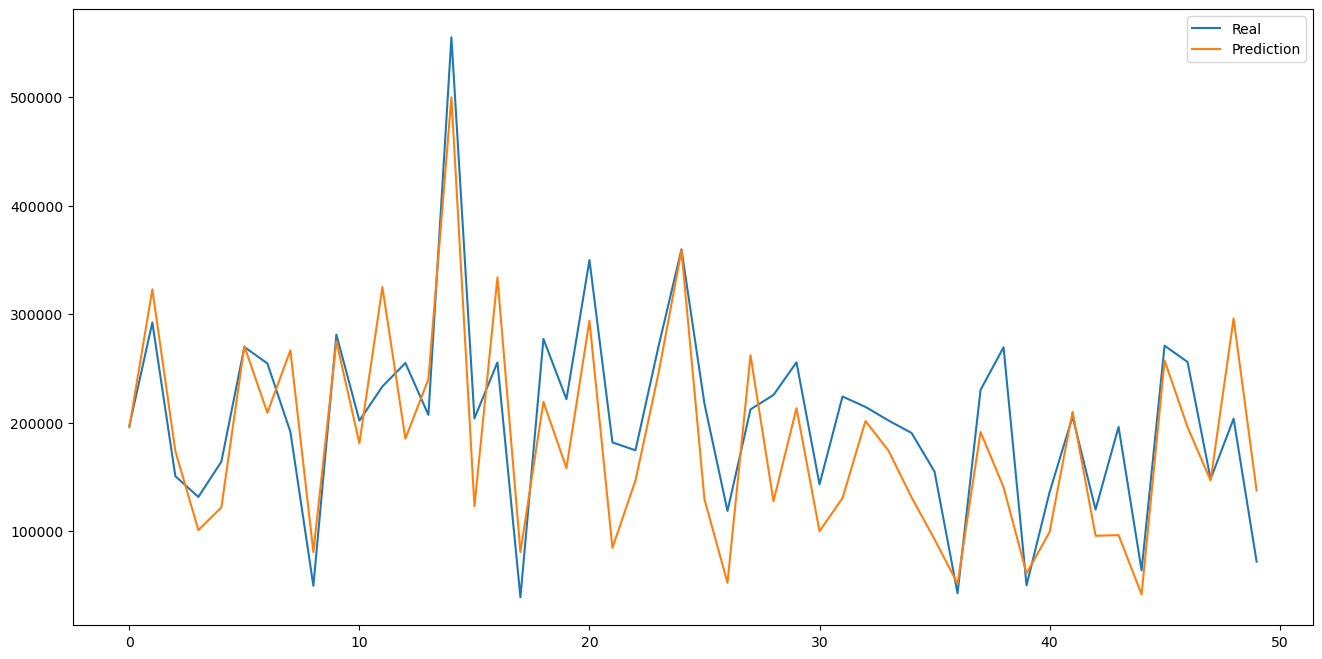

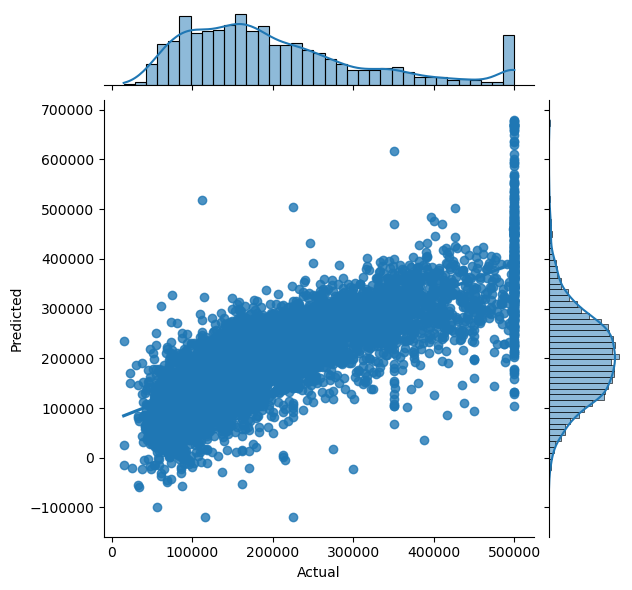

In [58]:
df_final = pd.DataFrame({'Predicted':predictions,'Actual':y_test})
df_final = df_final.reset_index()
df_final = df_final.drop(['index'],axis=1)
fig= plt.figure(figsize=(16,8))
plt.plot(df_final[:50])
plt.legend(['Real','Prediction'])
sns.jointplot(x='Actual',y='Predicted',data=df_final,kind='reg',);